# Adam Thomson - PHY 573 - Week 4

## Simon's Algorithm

In [6]:
# Import libraies
import numpy as np
from IPython.display import Math, HTML
from qiskit import QuantumCircuit as QCir, transpile
from qiskit.visualization import plot_histogram

from qiskit_aer import AerSimulator

sampler = AerSimulator()

Simon's Algorithm is another quantum improvement on the classical algorithm to categorize a black-box oracle function. In this case, the function is known to be either 1:1 or 2:1 (ie. either every input has a unique output, or every input has a paired input with a matching output). If the function is 2:1, then the mapping is defined according to a hidden bitstring, b, such that

In [3]:
# define the hidden bitstring b
display(Math(r'''
\text{given }x_1, x_2: f(x_1) = f(x_2) \rArr x_1 \oplus x_2 = b
'''))

<IPython.core.display.Math object>

Notice that the case for a 1:1 oracle is when b = 00..0

Classically, this requires checking inputs until a matching output is found for a previous input. In a lucky best case, this is 2 checks that produce the same output. In the worst case, a 1:1 oracle will always require checking more than half of all possible inputs, 2^(n-1) + 1 times.

The quantum approach uses 2 quantum registers of n qubits. The qubits in the first register pass through Hadamard gates before use in the oracle, which is applied to all qubits across both registers. Measurement of the second register at this point will yield a possible f(x); this value is not relevant to the question being solved, but does put the first register in a desirable state. The first register qubits then pass through another H-gate before measurement. This measurement will reveal one bitstring, z, whose inner product with b = 0. Through repeated application of the algorithm, b can be determined with enough values for z. This can be done in ~n applications, much fewer than the classical worst case!

We'll examine how this works in more depth by following the qiskit example here: https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/simon.ipynb

### Example Application

First, let's walkthrough the example where n=2; b=11. Note that there are 4 qubits in the full state because we need 2n inputs

In [8]:
# Initialize state
display(Math(r"""
\ket{\psi_1} = \ket{00}_1 \ket{00}_2
"""))

<IPython.core.display.Math object>

In [16]:
# Apply a Hadamard to both qubits in first register
display(Math(r"""
\ket{\psi_2} = (H \otimes H \otimes I \otimes I)\ket{\psi_1}
\\\\\qquad = (H \otimes H)\ket{00}_1 \otimes \ket{00}_2
\\\\\qquad = ((H\ket0) \otimes (H\ket0))_1 \otimes \ket{00}_2
\\\\\qquad = ((\frac1{\sqrt2}(\ket0 + \ket1) \otimes (\frac1{\sqrt2}(\ket0 + \ket1))_1 \otimes \ket{00}_2
\\\\\qquad = \frac12(\ket{00}_1 + \ket{01}_1 + \ket{10}_1 + \ket{11}_1) \otimes \ket{00}_2
"""))

<IPython.core.display.Math object>

In [37]:
# Use circuit diagram as demonstration for how to construct the oracle for b=11
display(Math(r"""
Q_f = CX_{1_a 2_a}CX_{1_a 2_b}CX_{1_b 2_a}CX_{1_b 2_b}
"""))

display(Math(r"""
\ket{\psi_3} = Q_f \ket{\psi_2}
\\\\\qquad = [CX_{1_a 2_a}CX_{1_a 2_b}CX_{1_b 2_a}CX_{1_b 2_b}] \ket{\psi_2}
\\\\\qquad = CX_{1_b 2_b}(CX_{1_b 2_a}(CX_{1_a 2_b}(CX_{1_a 2_a} \ket{\psi_2})))
"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
# Examine how each CX gate effects each piece of the superposition
display(Math(r"""
CX_{1_a 2_a} \ket{00}_1 \ket{xy}_2 = \ket{00}_1 \ket{xy}_2
\\\\ CX_{1_a 2_a} \ket{01}_1 \ket{xy}_2 = \ket{01}_1 \ket{xy}_2
\\\\ CX_{1_a 2_a} \ket{10}_1 \ket{xy}_2 = \ket{10}_1 \ket{\tilde xy}_2
\\\\ CX_{1_a 2_a} \ket{11}_1 \ket{xy}_2 = \ket{11}_1 \ket{\tilde xy}_2
"""))

display(Math(r"""
CX_{1_a 2_b} \ket{00}_1 \ket{xy}_2 = \ket{00}_1 \ket{xy}_2
\\\\ CX_{1_a 2_b} \ket{01}_1 \ket{xy}_2 = \ket{01}_1 \ket{xy}_2
\\\\ CX_{1_a 2_b} \ket{10}_1 \ket{xy}_2 = \ket{10}_1 \ket{x\tilde y}_2
\\\\ CX_{1_a 2_b} \ket{11}_1 \ket{xy}_2 = \ket{11}_1 \ket{x\tilde y}_2
"""))

display(Math(r"""
CX_{1_b 2_a} \ket{00}_1 \ket{xy}_2 = \ket{00}_1 \ket{xy}_2
\\\\ CX_{1_b 2_a} \ket{01}_1 \ket{xy}_2 = \ket{01}_1 \ket{\tilde x y}_2
\\\\ CX_{1_b 2_a} \ket{10}_1 \ket{xy}_2 = \ket{10}_1 \ket{xy}_2
\\\\ CX_{1_b 2_a} \ket{11}_1 \ket{xy}_2 = \ket{11}_1 \ket{\tilde x y}_2
"""))

display(Math(r"""
CX_{1_b 2_b} \ket{00}_1 \ket{xy}_2 = \ket{00}_1 \ket{xy}_2
\\\\ CX_{1_b 2_b} \ket{01}_1 \ket{xy}_2 = \ket{01}_1 \ket{x\tilde y}_2
\\\\ CX_{1_b 2_b} \ket{10}_1 \ket{xy}_2 = \ket{10}_1 \ket{xy}_2
\\\\ CX_{1_b 2_b} \ket{11}_1 \ket{xy}_2 = \ket{11}_1 \ket{x\tilde y}_2
"""))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [46]:
# Apply oracle to state
display(Math(r"""
\ket{\psi_3} = CX_{1_b 2_b}(CX_{1_b 2_a}(CX_{1_a 2_b}(CX_{1_a 2_a} \ket{\psi_2})))
"""))

display(Math(r"""
\qquad = \frac12 CX_{1_b 2_b}(CX_{1_b 2_a}(CX_{1_a 2_b}(
 \ket{00}_1 \ket{00}_2 + \ket{01}_1 \ket{00}_2 + \ket{10}_1 \ket{10}_2 + \ket{11}_1 \ket{10}_2
)))
"""))

display(Math(r"""
\qquad = \frac12 CX_{1_b 2_b}(CX_{1_b 2_a}(
 \ket{00}_1 \ket{00}_2 + \ket{01}_1 \ket{00}_2 + \ket{10}_1 \ket{11}_2 + \ket{11}_1 \ket{11}_2
))
"""))

display(Math(r"""
\qquad = \frac12 CX_{1_b 2_b}(
 \ket{00}_1 \ket{00}_2 + \ket{01}_1 \ket{10}_2 + \ket{10}_1 \ket{11}_2 + \ket{11}_1 \ket{01}_2
))
"""))

display(Math(r"""
\qquad = \frac12 (
 \ket{00}_1 \ket{00}_2 + \ket{01}_1 \ket{11}_2 + \ket{10}_1 \ket{11}_2 + \ket{11}_1 \ket{00}_2
))
"""))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From this state, the second register will always produce a measurement of 00 or 11, each with a 50% probability. For the sake of the example, let's assume that second register is measured as 11. Measurement forces the system into the state

In [52]:
# State after measurement, omitting second register
display(Math(r"""
\ket{\psi_4} = \frac1{\sqrt2}( \ket{01}_1 + \ket{10}_1)
"""))

<IPython.core.display.Math object>

We then apply Hadamard gates to the first register again, producing the final state

In [60]:
# Finish circuit to prepare for measurement
display(Math(r"""
\ket{\psi_5} = (H \otimes H) \ket{\psi_4}
\\\\ \qquad = \frac1{\sqrt2} ((H\ket0 \otimes H\ket1) + (H\ket1 \otimes H\ket0))
"""))

display(Math(r"""
\qquad = \frac1{\sqrt2} \Big(
    \frac12((\ket0 + \ket1) \otimes (\ket0 - \ket1)) +  
    \frac12((\ket0 - \ket1) \otimes (\ket0 + \ket1))
\Big)
"""))

display(Math(r"""
\qquad = \frac1{2\sqrt2} \Big(
    \ket{00} - \cancel{\ket{01}} + \cancel{\ket{10}} - \ket{11} +
    \ket{00} + \cancel{\ket{01}} - \cancel{\ket{10}} - \ket{11}
\Big)
"""))

display(Math(r"""
\qquad = \frac1{\sqrt2} ( \ket{00} - \ket{11})
"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Putting us in a state where measurement will yield either 00 or 11 with equal probability. What do these results tell us?

In [73]:
# Examine consequences of measurement
display(Math(r"""
\text{If we measure } \ket{00} \text{, we don't learn much. This is the trivial state since } \forall x, y: xy \cdot 00 = 0 
"""))

display(Math(r"""
\text{If we measure } \ket{11} \text{, then we know that } b \cdot 11 = 0
"""))

display(Math(r"""
\text{This tells us that } b \notin \{ 01, 10 \},
             \\\\ \therefore b \in \{ 00, 11 \}
"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Again, b=00 is the trivial case that implies the oracle is 1:1, and will always be a potential solution. So if we assume that b=11, then we can check by picking a different input and verifying.

In [81]:
# Pick a different input and verify
display(Math(r"""
x_i = 01
\\\\ x_j = x_i \oplus b = 01 \oplus 11 = 10
"""))

display(Math(r"""
f(x_i) = f(x_j) = 11
\\\\ \therefore b=11
"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Example Circuit

Let's construct a 3-qubit example circuit to run on a simulator and real hardware

In [83]:
# set our secret string
b = '110'
reveal_secret = f'''
<details>
    <summary>Click here to reveal the secret!</summary>
    b={b}
</details>
'''
HTML(reveal_secret)

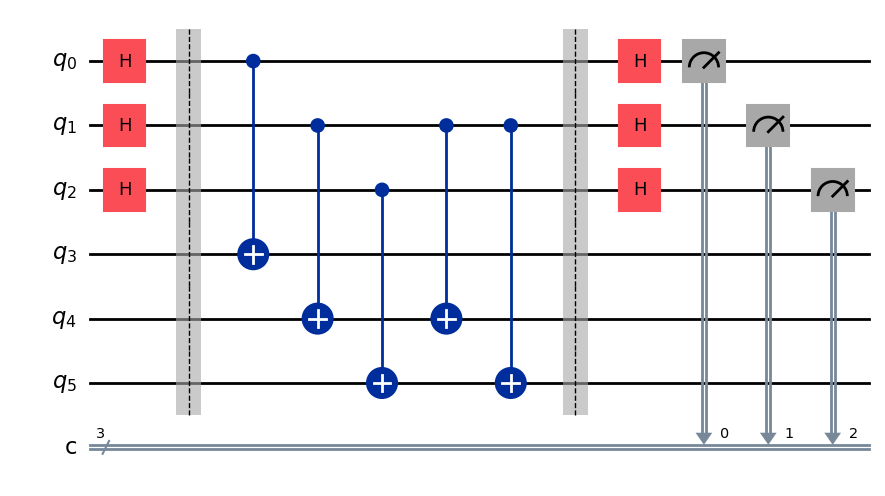

In [84]:
# build the circuit
n = len(b)

# Need 2n qubits for input to the oracle and n classical bits for measurement
simon_circuit = QCir(n*2, n)

# Apply Hadamard gates to first quantum register
simon_circuit.h(range(n))

simon_circuit.barrier()

# simon_oracle function is deprecated, copy setup from the book for this string
simon_circuit.cx(0,n)
simon_circuit.cx(1,n+1)
simon_circuit.cx(2,n+2)
simon_circuit.cx(1,n+1)
simon_circuit.cx(1,n+2)

simon_circuit.barrier()

# Apply Hadamard gates to first register again
simon_circuit.h(range(n))

# Measure first register
simon_circuit.measure(range(n), range(n))
simon_circuit.draw(output="mpl", style="iqp")

Simulate the circuit and interpret the results

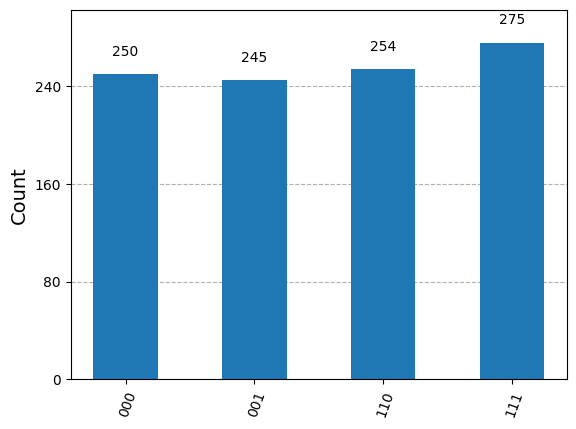

In [87]:
# run on local simulation
results = sampler.run(simon_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

We already know b=110, so we can verify these results

In [97]:
# Util for bitwise dot product
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    display(Math(r"{} \cdot {} = {}".format(b, z, bdotz(b,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This confirms that our simulated results match the expected definition of b! But what if we didn't know b and only had the results, let's show how to solve for it.

Use measured results and definition of b to recover the individual pieces.
Since `z=000` is always an expected result, let's start with `z=001`.

In [123]:
# Use system of equations to find b
display(Math(r"""
\forall z: b \cdot z = 0
\\\\ z = 001
\\\\ b \cdot 001 = 0
\\\\ \cancel{(b_2 \cdot 0)} + \cancel{(b_1 \cdot 0)} + (b_0 \cdot 1) = 0
\\\\ (b_0 \cdot 1) = 0
\\\\ \therefore b_0 = 0
"""))

display(Math(r"""
\text{It does not matter which other result we use, but let's pick 110 for the sake of not following the example exactly.}
\\\\ z = 110
\\\\ b \cdot 110 = 0
\\\\ (b_2 \cdot 1) + (b_1 \cdot 1) + \cancel{(0 \cdot 0)} = 0
\\\\ (b_2 \cdot 1) + (b_1 \cdot 1) = 0
"""))

display(Math(r"""
\text{This tells us that } b_2 = b_1, \text{thus } b \isin \{ 000, 110 \}
"""))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Since b=000 is always a possible solution, we are left with the correct non-trivial solution `b=110`!

### Experimenting on real hardware

Now that qiskit allows for more than 6 qubits, we do not need to adjust the circuit to run on real hardware.

In [124]:
# Real hardware experiment setup
# Additional imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_kyiv'

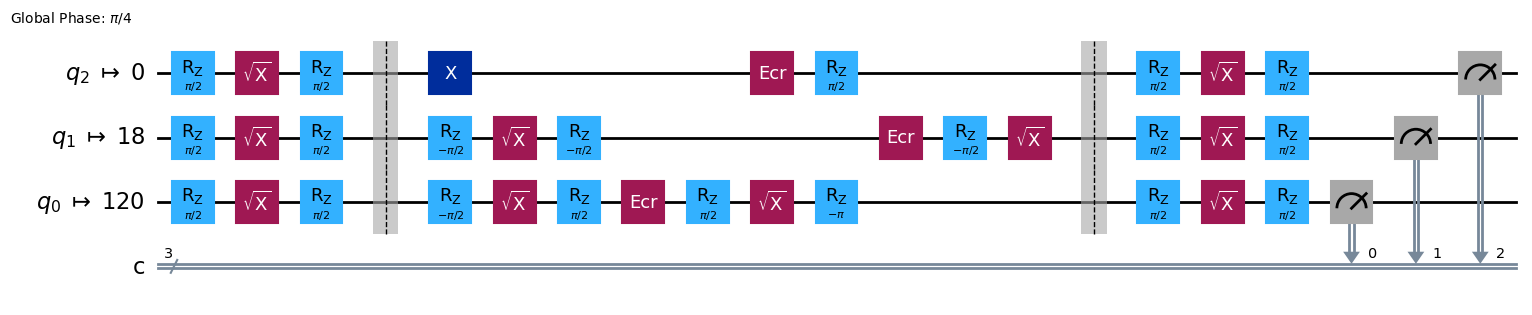

In [127]:
# Transpile the circuit for operating on real quantum hardward
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(simon_circuit)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [128]:
# Run the circuit and wait for the results
sampler2 = SamplerV2(mode=backend)
sampler2.options.default_shots = 1_000
result = sampler2.run([circuit_isa]).result()[0]

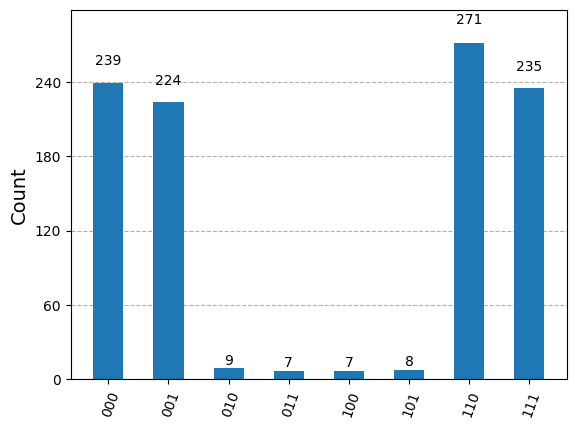

In [129]:
# Plot the results
test_counts = result.data.c.get_counts()
plot_histogram(test_counts)

We can see that the real results almost exactly match the simulated results in that the correct values of z have an almost equal probability of measurement, but we also see measurements for values where z ⋅ b != 0

In [131]:
# Verify real results
for z in test_counts:
    display(Math(r"{} \cdot {} = {} ({:.1f}\%)".format(b, z, bdotz(b,z), test_counts[z]*100/sampler2.options.default_shots)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This confirms that most of our results are correct in that `z ⋅ b = 0` (mod 2), but we have a small percentage chance of measuring a value that if used in our system of equation for b will produce incorrect results. By taking enough samples to gain statistical precision for calculating b, this can still be done in less queries than the classical O(2^(n-1)).